In [1]:
import sys
assert sys.version_info >= (3, 5)
import os
import sklearn
assert sklearn.__version__ >= "0.20"
# To plot figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Assignment3"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
#from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing data from csv

In [3]:
#Load data from CSV files
def load_data(_path):
    csv_path = os.path.join("archive", _path)
    return pd.read_csv(csv_path, header=None, sep="\t")

d_PS1 = load_data("PS1.txt")
d_PS2 = load_data("PS2.txt")
d_PS3 = load_data("PS3.txt")
d_PS4 = load_data("PS4.txt")
d_PS5 = load_data("PS5.txt")
d_PS6 = load_data("PS6.txt")

#d_EPS1 = load_data("EPS1.txt")

#d_FS1 = load_data("FS1.txt")
#d_FS2 = load_data("FS2.txt")

#d_TS1 = load_data("TS1.txt")
#d_TS2 = load_data("TS2.txt")
#d_TS3 = load_data("TS3.txt")
#d_TS4 = load_data("TS4.txt")

#d_VS1 = load_data("VS1.txt")

#d_CE = load_data("CE.txt")
#d_CP = load_data("CP.txt")
#d_SE = load_data("SE.txt")

d_PROFILE = load_data("profile.txt")

In [4]:
#d_PS1.T.iloc[0:,1:3].plot()
#d_PS1.T.iloc[0:,501:503].plot()
#d_PS1.T.iloc[0:,651:654].plot()
#d_PS1.T.iloc[0:,1001:1003].plot()
#save_fig("pressure_plots")
#plt.plot()

In [5]:
#d_PS1.T.iloc[0:,0:700].plot(figsize=(15,15))
#save_fig("pressure_plots")
#plt.plot()

# Data Preperations

In [6]:
ps1_mean=d_PS1.mean(axis=1)
ps2_mean=d_PS2.mean(axis=1)
ps3_mean=d_PS3.mean(axis=1)
ps4_mean=d_PS4.mean(axis=1)
ps5_mean=d_PS5.mean(axis=1)
ps6_mean=d_PS6.mean(axis=1)

In [7]:
df_pressure=pd.DataFrame({"PS1":ps1_mean,"PS2":ps2_mean,"PS3":ps3_mean,"PS4":ps4_mean,"PS5":ps5_mean,"PS6":ps6_mean})
df_pressure.head()

,PS1,PS2,PS3,PS4,PS5,PS6
0,160.673492,109.466914,1.991475,0.0,9.842170,9.728097
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636


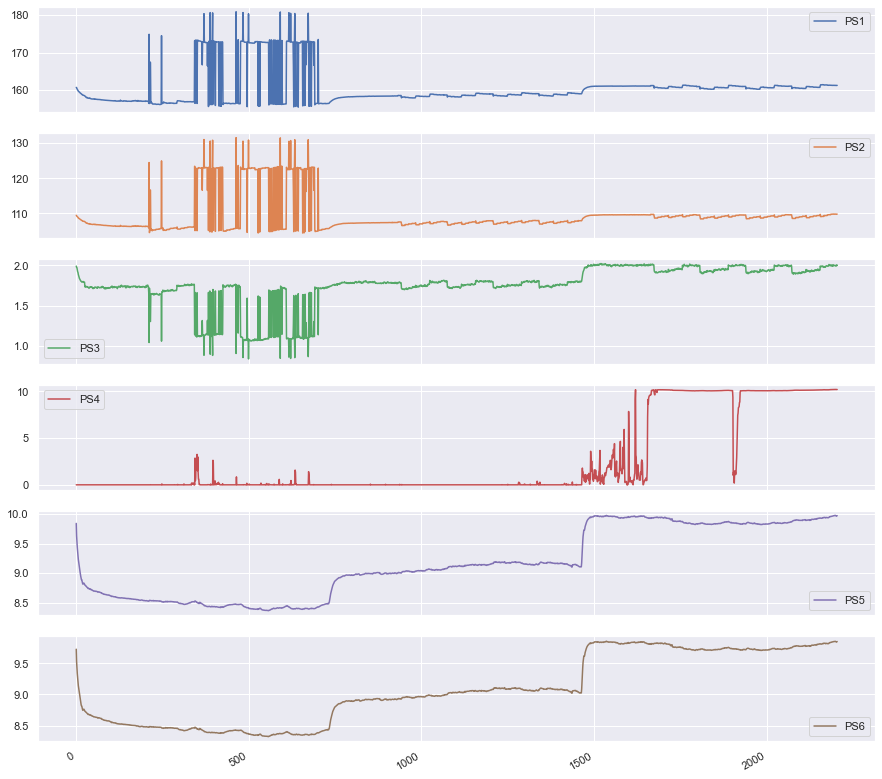

In [8]:
df_pressure.plot(subplots=True,figsize=(15,15))
#save_fig("pressure_plots")
plt.show()

In [9]:
#At first it looked like PS4 only contained close to 0 values, but after checking the mean i concluded that i needed to keep it.
#df.drop(["PS4"], axis=1)
ps4_mean
#This drift from 0 to 10 over the course of 2204 runs might indicate that something is drifting from normal conditions.

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
2200    10.202473
2201    10.197919
2202    10.196824
2203    10.198588
2204    10.203126
Length: 2205, dtype: float64

In [10]:
#Checking the profile shape, (.shape not needed in jupyter notebook)
d_PROFILE

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


In [11]:
df_profile=pd.DataFrame({"Cooler_Condition":d_PROFILE.iloc[:,-5],"Valve_Condition":d_PROFILE.iloc[:,-4],
                         "Internal_Pump_Leakage":d_PROFILE.iloc[:,-3],"Hydraulic_Accumulator":d_PROFILE.iloc[:,-2],
                         "Stable_Flag":d_PROFILE.iloc[:,-1]})
df_profile

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


In [12]:
df=pd.concat([df_pressure,df_profile], axis=1)
df

,PS1,PS2,PS3,PS4,PS5,PS6,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.000000,9.842170,9.728097,3,100,0,130,1
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,3,100,0,130,1
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,3,100,0,130,1
3,160.188088,109.064807,1.946575,0.000000,9.438827,9.337430,3,100,0,130,1
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...
2200,161.227572,109.779581,2.001438,10.202473,9.972037,9.850361,100,100,0,90,0
2201,161.206070,109.787481,1.998781,10.197919,9.966184,9.844854,100,100,0,90,0
2202,161.192120,109.756174,1.993436,10.196824,9.964329,9.842628,100,100,0,90,0
2203,161.208917,109.793884,2.007077,10.198588,9.968232,9.846690,100,100,0,90,0


# Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1                    2205 non-null   float64
 1   PS2                    2205 non-null   float64
 2   PS3                    2205 non-null   float64
 3   PS4                    2205 non-null   float64
 4   PS5                    2205 non-null   float64
 5   PS6                    2205 non-null   float64
 6   Cooler_Condition       2205 non-null   int64  
 7   Valve_Condition        2205 non-null   int64  
 8   Internal_Pump_Leakage  2205 non-null   int64  
 9   Hydraulic_Accumulator  2205 non-null   int64  
 10  Stable_Flag            2205 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 189.6 KB


In [14]:
df.describe()

,PS1,PS2,PS3,PS4,PS5,PS6,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,41.240816,90.693878,0.669388,107.199546,0.342857
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,42.383143,10.681802,0.817233,16.435848,0.474772
min,155.391547,104.406307,0.840252,0.000000,8.365800,8.321527,3.000000,73.000000,0.000000,90.000000,0.000000
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,3.000000,80.000000,0.000000,90.000000,0.000000
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,20.000000,100.000000,0.000000,100.000000,0.000000
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729275,100.000000,100.000000,1.000000,130.000000,1.000000
max,180.922708,131.589089,2.023398,10.207068,9.978510,9.856591,100.000000,100.000000,2.000000,130.000000,1.000000


In [15]:
df.var()

PS1                        22.084591
PS2                        24.866035
PS3                         0.063454
PS4                        18.312876
PS5                         0.332117
PS6                         0.302048
Cooler_Condition         1796.330820
Valve_Condition           114.100893
Internal_Pump_Leakage       0.667869
Hydraulic_Accumulator     270.137114
Stable_Flag                 0.225408
dtype: float64

In [16]:
#Checking correlation between the different pressures and the targets (profiles)
df.corr()

,PS1,PS2,PS3,PS4,PS5,PS6,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
PS1,1.000000,0.995294,-0.719679,0.043416,-0.125801,-0.124423,-0.002000,-0.152883,0.311859,-0.198940,-0.232049
PS2,0.995294,1.000000,-0.767557,-0.020001,-0.200835,-0.199468,-0.075386,-0.098491,0.309810,-0.180580,-0.206720
PS3,-0.719679,-0.767557,1.000000,0.484111,0.755438,0.754532,0.662852,0.163278,-0.355070,-0.006242,0.237027
PS4,0.043416,-0.020001,0.484111,1.000000,0.744478,0.744778,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.949962,0.020317,-0.016579,-0.209262,0.021458
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.950316,0.020284,-0.016262,-0.210282,0.021353
Cooler_Condition,-0.002000,-0.075386,0.662852,0.832446,0.949962,0.950316,1.000000,0.004952,-0.004656,-0.203954,-0.004105
Valve_Condition,-0.152883,-0.098491,0.163278,-0.146385,0.020317,0.020284,0.004952,1.000000,-0.352610,-0.082222,0.629433
Internal_Pump_Leakage,0.311859,0.309810,-0.355070,0.154950,-0.016579,-0.016262,-0.004656,-0.352610,1.000000,0.077303,-0.549678
Hydraulic_Accumulator,-0.198940,-0.180580,-0.006242,-0.001021,-0.209262,-0.210282,-0.203954,-0.082222,0.077303,1.000000,-0.120817


Saving figure heatmap


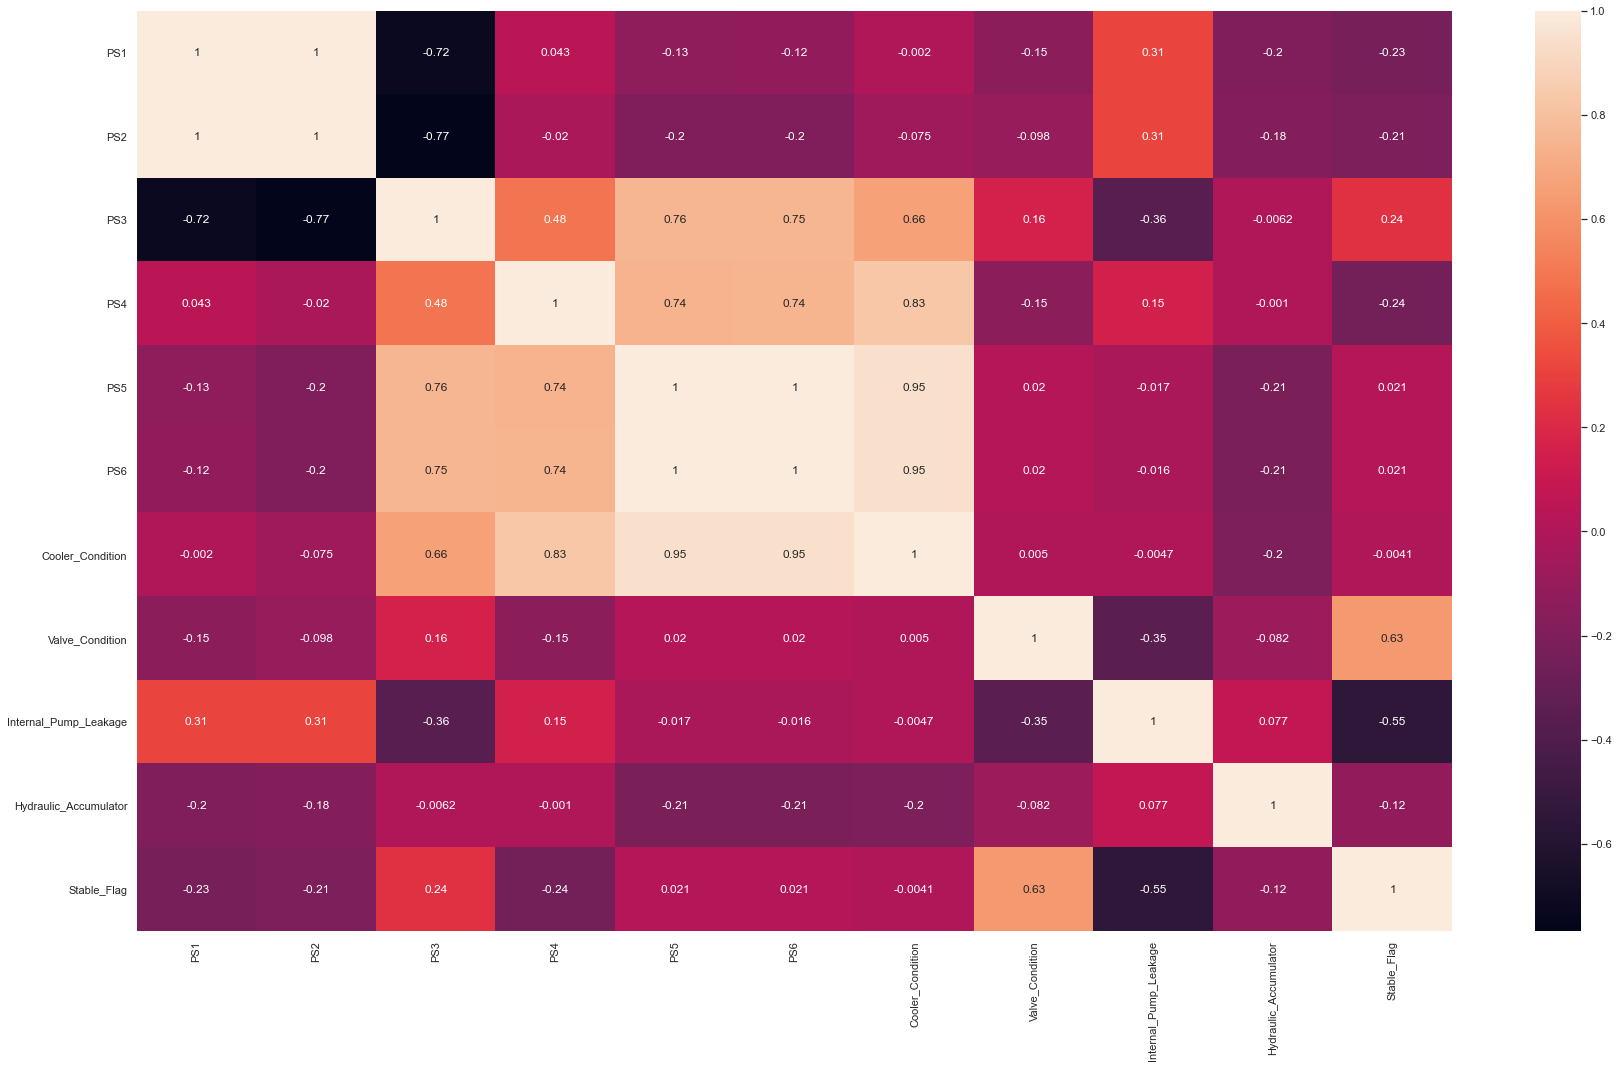

In [17]:
#Plotting a figure for graphical representation of the correlation
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df.corr(),annot=True)
save_fig("heatmap")

In [18]:
#Sorting the pressures - target correlation (from highest to lowest)
df_final_corr=df.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr_target=df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)
df_final_corr_target

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
PS6,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,0.949962,0.020317,-0.016579,-0.209262,0.021458
PS4,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS3,0.662852,0.163278,-0.355070,-0.006242,0.237027
PS1,-0.002000,-0.152883,0.311859,-0.198940,-0.232049
PS2,-0.075386,-0.098491,0.309810,-0.180580,-0.206720


# Analysing Correlation

PS1 and PS2 have low to non positive or negative correlation with the Cooler_Condition target. These two datasets could therefore be dropped from the dataframe when focusing on Cooler_Condition target.

In [19]:
df_pressure_final = df_pressure.drop(columns=['PS1', 'PS2'])
df_pressure_final

,PS3,PS4,PS5,PS6
0,1.991475,0.000000,9.842170,9.728097
1,1.976234,0.000000,9.635142,9.529488
2,1.972224,0.000000,9.530548,9.427949
3,1.946575,0.000000,9.438827,9.337430
4,1.922707,0.000000,9.358762,9.260636
...,...,...,...,...
2200,2.001438,10.202473,9.972037,9.850361
2201,1.998781,10.197919,9.966184,9.844854
2202,1.993436,10.196824,9.964329,9.842628
2203,2.007077,10.198588,9.968232,9.846690


# Data Preprocessing

In [20]:
x=df_pressure_final
x

,PS3,PS4,PS5,PS6
0,1.991475,0.000000,9.842170,9.728097
1,1.976234,0.000000,9.635142,9.529488
2,1.972224,0.000000,9.530548,9.427949
3,1.946575,0.000000,9.438827,9.337430
4,1.922707,0.000000,9.358762,9.260636
...,...,...,...,...
2200,2.001438,10.202473,9.972037,9.850361
2201,1.998781,10.197919,9.966184,9.844854
2202,1.993436,10.196824,9.964329,9.842628
2203,2.007077,10.198588,9.968232,9.846690


In [21]:
y=df_profile
y

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


In [22]:
target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target = target_1 #Change target used in ML here
t_name = "target1_" #Change target used in ML here

In [23]:
round((target.value_counts(normalize=True)),4)

100    0.3361
3      0.3320
20     0.3320
Name: Cooler_Condition, dtype: float64

In [24]:
train_x,test_x,train_y,test_y=train_test_split(x,target,test_size=0.2,random_state=1)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

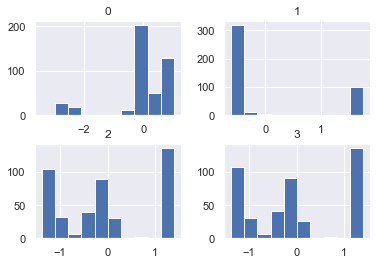

In [32]:
test = pd.DataFrame(test_x)
from matplotlib import pyplot
test.hist()
pyplot.show()

- Lag en pipeline, IKKE NØDVENDIG -> Ikke nødvendig da det ikke er behov for fylling av NAN verdier eller tillegging av attributer eller OneHotEncoding. StandardScalar brukes direkte.
- Kopier alle modeller fra tidligere assignment -> GJORT
- Lagre oversikt over best model (csv)
- Test tuning av parameter for modellene som ser best ut (dokumenter) -> GJORT
- Skriv rapport

# Logistic Regression

In [ ]:
l_classifier=LogisticRegression(random_state=42)
l_classifier.fit(train_x,train_y)

In [ ]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

In [ ]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)

# KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10,p=2)
knn.fit(train_x,train_y)

In [ ]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test) #overfitting

In [ ]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

# SVC

In [ ]:
svc=SVC(kernel="rbf")
svc.fit(train_x,train_y)

In [ ]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

In [ ]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision_weighted"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

# Decision Tree Classifier

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
dtc.fit(train_x,train_y)

In [ ]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) 

In [ ]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)

In [ ]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

# Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,random_state=1)
#Using max_features=4 and random_state=42 instead of 1 gives better result.
rfc.fit(train_x,train_y)

In [ ]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
final_mse = mean_squared_error(test_y, pred_test_y)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
confidence = 0.95
squared_errors = (pred_test_y - test_y) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [ ]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

In [ ]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

# Best Model

In [ ]:
pred_train_accuracy=[accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train
                     ,accuracy_score_dtc_train,accuracy_score_rfc_train]
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test
                    ,accuracy_score_dtc_test,accuracy_score_rfc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train
                     ,precision_score_dtc_train,precision_score_rfc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test
                     ,precision_score_dtc_test,precision_score_rfc_test]

In [ ]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [ ]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","decission_tree","random_for"],axis=0,inplace=True)
df_best_model

# Fine-Tune Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_x,train_y)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
final_predictions = final_model.predict(test_x)

final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
sns.heatmap(confusion_matrix(test_y,final_predictions),annot=True)

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - test_y) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))